In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def CVaR(returns, alpha):
    var = np.sort(returns[:])[int(len(returns[:]) * alpha)]
    idx = np.where(returns[:] <= var)
    CVaR = np.mean(returns[idx])
    return CVaR

def read(name, rang, alpha=0.25):
    file = np.load(name%(0))
    cvar = np.zeros(file.shape[0])
    for i in range(file.shape[0]):
        var = np.sort(file[i, :])[int(len(file[i, :]) * alpha)]
        idx = np.where(file[i, :] <= var)
        cvar[i] = np.mean(file[i, idx])
    cvar = np.expand_dims(cvar, axis = 0)
    
    for i in range(1, rang):
        file = np.load(name%(i))
        temp = np.zeros(file.shape[0])
        for i in range(file.shape[0]):
            var = np.sort(file[i, :])[int(len(file[i, :]) * alpha)]
            idx = np.where(file[i, :] <= var)
            temp[i] = np.mean(file[i, idx])
        temp = np.expand_dims(temp, axis = 0)
        cvar = np.concatenate([cvar, temp], axis = 0)
    return cvar
def CVaRplot(ax, ret, label):
    mean = np.mean(ret, axis=0)
    std = np.std(ret, axis=0)
    plt.plot(mean, label=label, linewidth=2)
    plt.fill_between(np.arange(mean.shape[0]), mean-0.5*std, mean+0.5*std, alpha=0.4)

Machine Repair, nS = 10, 3 Different Policies: 

1. p1: not repair
2. p2: repair at [-1]
3. p3: repair at [-2]
4. p4: reapir at [-3]

In [46]:
p2 = np.load('results/reutrns_p2.npy')
p3 = np.load('results/reutrns_p3.npy')
p4 = np.load('results/reutrns_p4.npy')
p5 = np.load('results/reutrns_p5.npy')
p6 = np.load('results/reutrns_p6.npy')
p7 = np.load('results/reutrns_p7.npy')
p8 = np.load('results/reutrns_p8.npy')
p9 = np.load('results/reutrns_p9.npy')

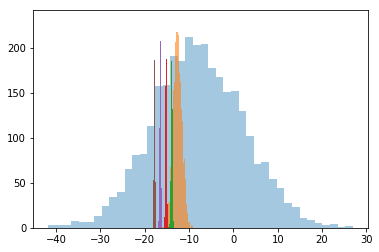

In [37]:
plt.hist(p2, bins=40, alpha=0.4, label='all not repair - 1');
plt.hist(p3, bins=40, alpha=0.6, label='all not repair - 2');
plt.hist(p4, bins=40, alpha=1, label='all not repair - 3');
plt.hist(p5, bins=40, alpha=1, label='all not repair - 4');
plt.hist(p6, bins=40, alpha=1, label='all not repair - 5');
plt.hist(p7, bins=40, alpha=1, label='all not repair - 6');

In [47]:
print(CVaR(p2, 0.25), CVaR(p3,0.25), CVaR(p4,0.25), CVaR(p5, 0.25), CVaR(p6, 0.25),\
      CVaR(p7, 0.25), CVaR(p8, 0.25),CVaR(p9, 0.25))

-20.66888775365751 -13.84705959272545 -14.128583926728682 -15.406251169207456 -16.69258923741405 -17.98446898597323 -19.259120801524134 -20.55660313202146


In [59]:
alpha = 0.01
CVaRalpha = np.array([CVaR(p2, alpha), CVaR(p3,alpha), CVaR(p4,alpha), CVaR(p5, alpha), CVaR(p6, alpha),\
      CVaR(p7, alpha), CVaR(p8, alpha),CVaR(p9, alpha)])

Text(0,0.5,'CVaR 0.25')

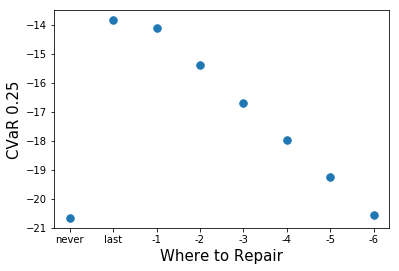

In [55]:
plt.plot([-20.66888775365751,-13.84705959272545,-14.128583926728682,\
          -15.406251169207456,-16.69258923741405, -17.98446898597323,\
         -19.259120801524134, -20.55660313202146], '.', markersize=15)
plt.xticks(np.arange(8), ['never', 'last', '-1', '-2', '-3', '-4', '-5', '-6'])
plt.xlabel('Where to Repair', fontsize=15)
plt.ylabel('CVaR 0.25', fontsize=15)

Text(0,0.5,'CVaR 0.01')

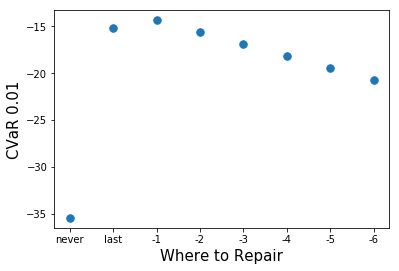

In [60]:
plt.plot(CVaRalpha, '.', markersize=15)
plt.xticks(np.arange(8), ['never', 'last', '-1', '-2', '-3', '-4', '-5', '-6'])
plt.xlabel('Where to Repair', fontsize=15)
plt.ylabel('CVaR 0.01', fontsize=15)

In [162]:
C1Opt20_eval = read('results/cdf_1_40_cdf_eval_%d.npy', 1, alpha=0.25)
C1Opt20_online = read('results/cdf_1_40_cdf_online_%d.npy', 1, alpha=0.25)

Text(0,0.5,'CVaR')

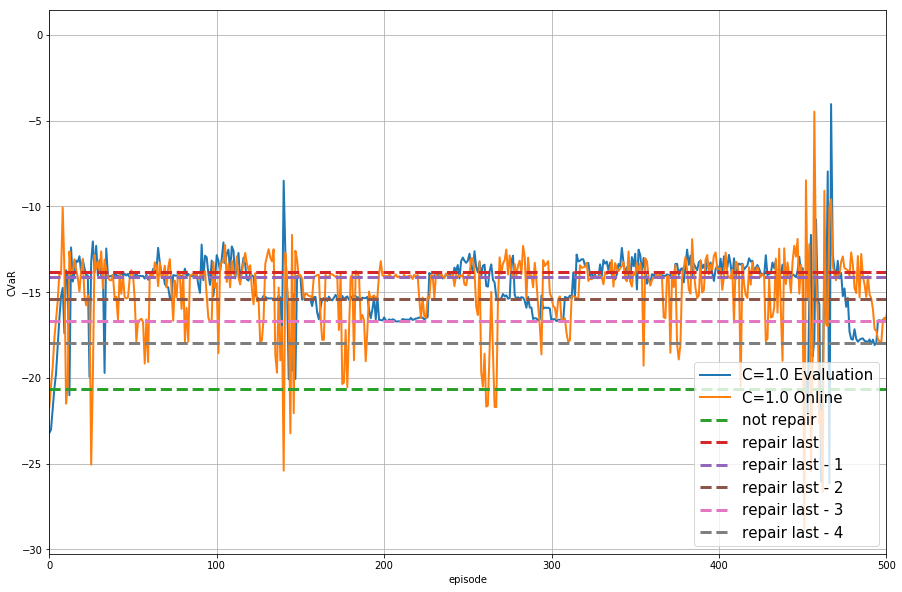

In [164]:
fig = plt.figure(figsize=(15, 10))
CVaRplot(fig, C1Opt20_eval, label='C=1.0 Evaluation')
CVaRplot(fig, C1Opt20_online, label='C=1.0 Online')

plt.plot(np.arange(1500), np.ones(1500) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.xlim([0, 500])
#plt.ylim([-25, -12])
plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

In [131]:
C05_eval = read('results/cdf_05_count_based_cdf_eval_%d.npy', 5, alpha=0.25)
C09_eval = read('results/cdf_09_count_based_cdf_eval_%d.npy', 2, alpha=0.25)
C055_eval = read('results/cdf_055_count_based_cdf_eval_%d.npy', 2, alpha=0.25)
C1_eval = read('results/cdf_alpha025_1_count_based_cdf_eval_%d.npy', 3, alpha=0.25)

C05_online = read('results/cdf_05_count_based_cdf_online_%d.npy', 5, alpha=0.25)
C09_online = read('results/cdf_09_count_based_cdf_online_%d.npy', 2, alpha=0.25)
C055_online = read('results/cdf_055_count_based_cdf_online_%d.npy', 2, alpha=0.25)
C1_online = read('results/cdf_alpha025_1_count_based_cdf_online_%d.npy', 3, alpha=0.25)

C1_eval_3000 = read('results/cdf_alpha025_3000_1_count_based_cdf_eval_%d.npy', 0, alpha=0.25)


Text(0,0.5,'CVaR')

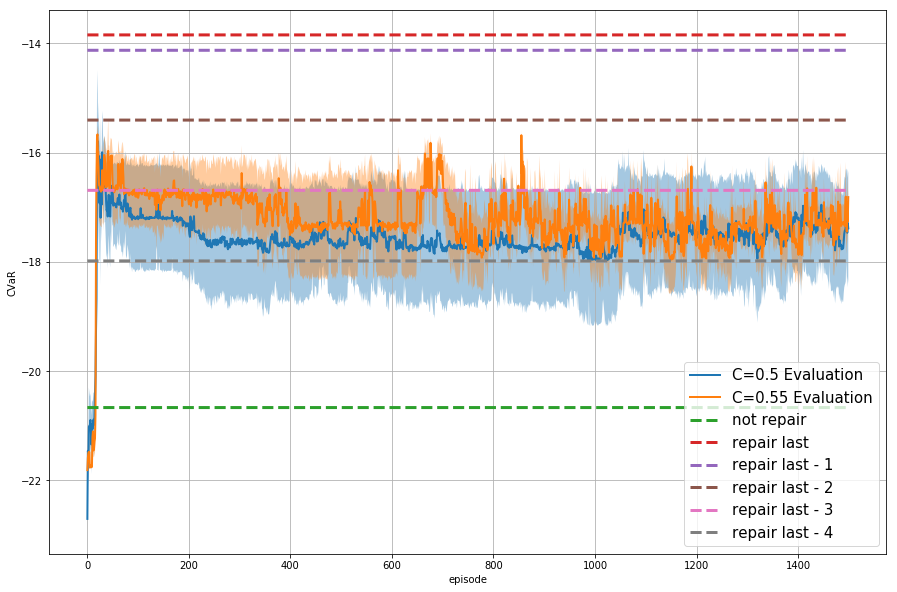

In [129]:
fig = plt.figure(figsize=(15, 10))
CVaRplot(fig, C05_eval, label='C=0.5 Evaluation')
CVaRplot(fig, C055_eval, label='C=0.55 Evaluation')

plt.plot(np.arange(1500), np.ones(1500) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

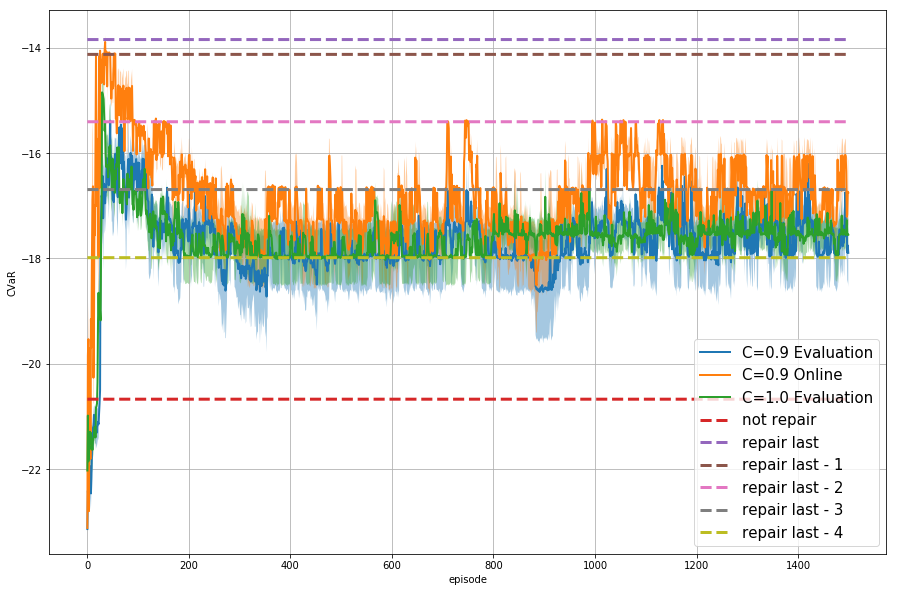

In [133]:
fig = plt.figure(figsize=(15, 10))
CVaRplot(fig, C09_eval, label='C=0.9 Evaluation')
CVaRplot(fig, C09_online, label='C=0.9 Online')

CVaRplot(fig, C1_eval, label='C=1.0 Evaluation')

plt.plot(np.arange(1500), np.ones(1500) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

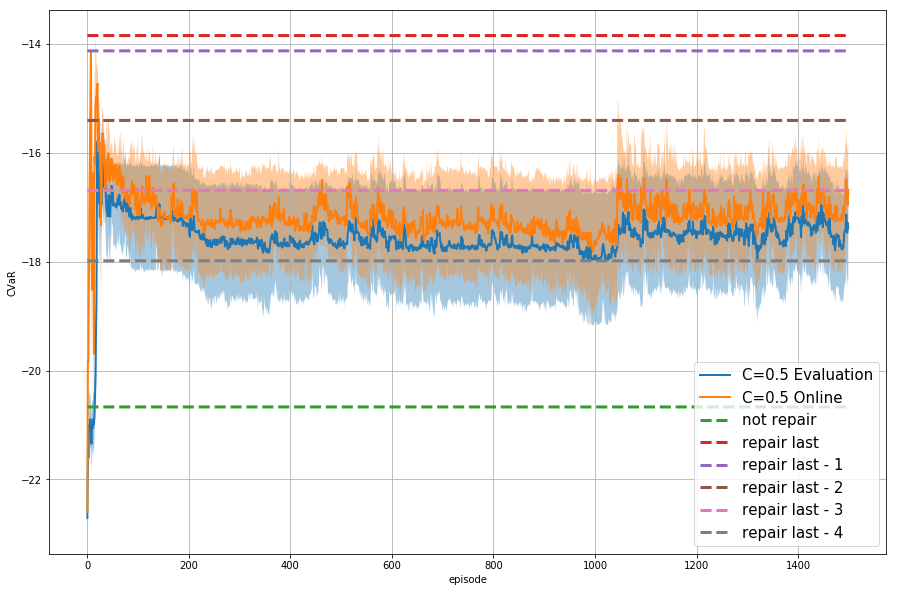

In [124]:
fig = plt.figure(figsize=(15, 10))
CVaRplot(fig, C05_eval, label='C=0.5 Evaluation')
CVaRplot(fig, C05_online, label='C=0.5 Online')

plt.plot(np.arange(1500), np.ones(1500) * -20.66888775365751, '--', label = 'not repair', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -13.8470595927254, '--',label = 'repair last', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -14.128583926728682, '--',label = 'repair last - 1', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -15.406251169207456, '--',label = 'repair last - 2', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -16.69258923741405, '--',label = 'repair last - 3', linewidth=3)
plt.plot(np.arange(1500), np.ones(1500) * -17.98446898597323, '--',label = 'repair last - 4', linewidth=3)

plt.legend(loc=4, fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')

Text(0,0.5,'CVaR')

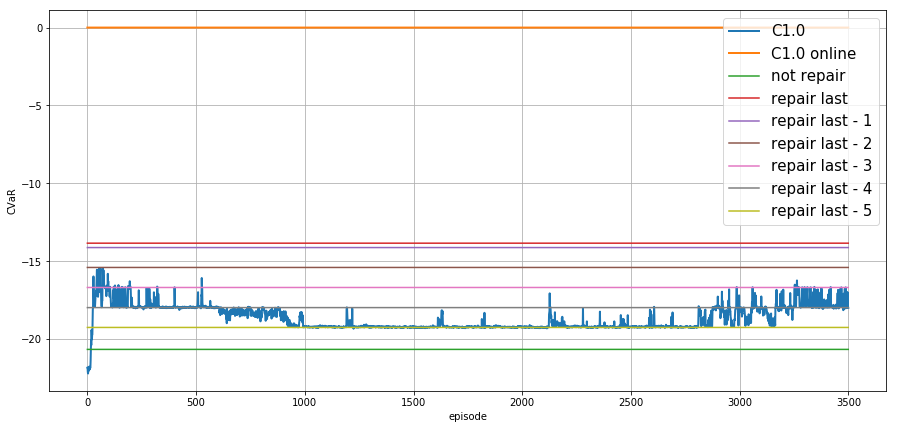

In [132]:
fig = plt.figure(figsize=(15, 7))
CVaRplot(fig, C1_eval_3000, label='C1.0')
CVaRplot(fig, C1_online_3000, label='C1.0 online')

plt.plot(np.arange(3500), np.ones(3500) * -20.66888775365751, label = 'not repair')
plt.plot(np.arange(3500), np.ones(3500) * -13.8470595927254, label = 'repair last')
plt.plot(np.arange(3500), np.ones(3500) * -14.128583926728682, label = 'repair last - 1')
plt.plot(np.arange(3500), np.ones(3500) * -15.406251169207456, label = 'repair last - 2')
plt.plot(np.arange(3500), np.ones(3500) * -16.69258923741405, label = 'repair last - 3')
plt.plot(np.arange(3500), np.ones(3500) * -17.98446898597323, label = 'repair last - 4')
plt.plot(np.arange(3500), np.ones(3500) *  -19.259120801524134, label = 'repair last - 5')

plt.legend(fontsize= 15)
plt.grid()
plt.xlabel('episode')
plt.ylabel('CVaR')